<a href="https://colab.research.google.com/github/dataAnalystInverpalmas/hyperblog/blob/main/regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [19]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [8]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,[4]].values

Separa conjuntos de entrenamiento y test

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

Escalado de variables

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
standar_x = StandardScaler()
x_train = standar_x.fit_transform(x_train)
x_test = standar_x.fit_transform(x_test)

Entrenar el modelo

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
reg = LogisticRegression(random_state=0)
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [28]:
#predicción
y_pred = reg.predict(x_test)

In [29]:
#evaluación
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [36]:
print("Shape of X_set:", X_set.shape)
print("Shape of y_set:", y_set.shape)

Shape of X_set: (280, 2)
Shape of y_set: (280, 1)


<ipython-input-37-294ff6243613>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set[:, 0] == j, 0], X_set[y_set[:, 0] == j, 1], c=ListedColormap(('blue', 'black'))(i), label=j)


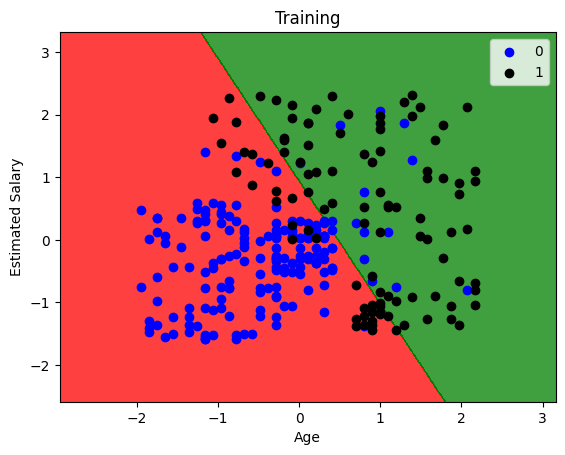

In [37]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set[:, 0] == j, 0], X_set[y_set[:, 0] == j, 1], c=ListedColormap(('blue', 'black'))(i), label=j)

plt.title('Training')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()